# Phase 2: Data Understanding

### Loading Libraries

To start, let's load the Kedro extension for IPython

In [33]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


Now we are going to load the necessary libraries before manipulating our data. This is essential to make sure we have all the tools we need.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### File upload

Loading 'games' DataFrame from kedro catalog

In [35]:
games = catalog.load("games")

[10/01/24 18:06:15] INFO     Loading data from games (CSVDataset)...                            ]8;id=103009;file://c:\Users\diego\OneDrive\Documentos\Kedro\metagames_kedro\env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=58611;file://c:\Users\diego\OneDrive\Documentos\Kedro\metagames_kedro\env\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

### Initial data exploration

Now that we have our data loaded, let's explore it a bit, so let's look at the first few rows.

In [36]:
games.head(100)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating,primary_genre,store_genres,publisher,developer,detected_technologies,store_asset_mod_time,review_percentage,players_right_now,24_hour_peak,all_time_peak,all_time_peak_date
0,0,Pizza Tower,/app/2231450/,2023-01-26,4529,19807,227,20034,96.39,Action (1),"Action (1), Indie (23)",Tour De Pizza,Tour De Pizza,Engine.GameMaker; SDK.FMOD,2023-01-10,98.0,"3,101","3,606",4529,2023-03-25
1,1,Resident Evil 4,/app/2050650/,2023-03-24,168191,61752,1616,63368,95.75,Action (1),"Action (1), Adventure (25)",CAPCOM Co. Ltd.,CAPCOM Co. Ltd.,Engine.RE_Engine; SDK.AMD_GPU_Services,2023-03-29,97.0,"46,289","47,164",168191,2023-03-25
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,2023-03-31,15543,12643,213,12856,95.54,Casual (4),"Casual (4), Free to Play (37), Indie (23), Sim...",SEGA,SEGA,Engine.Unity; SDK.UnityBurst; SDK.cURL,2023-03-24,98.0,618,776,15543,2023-03-31
3,3,Pineapple on pizza,/app/2263010/,2023-03-28,1415,11717,209,11926,95.39,Indie (23),"Casual (4), Free to Play (37), Indie (23)",Majorariatto,Majorariatto,Engine.Unity; SDK.cURL,2023-03-22,98.0,101,101,1415,2023-03-28
4,4,Hi-Fi RUSH,/app/1817230/,2023-01-25,6132,14152,324,14476,95.09,Action (1),Action (1),Bethesda Softworks,Tango Gameworks,Engine.Unreal; SDK.Intel_OID; SDK.Intel_XeSS; ...,2023-04-11,97.0,630,664,6132,2023-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Soundodger 2,/app/1400910/,2023-04-10,53,109,2,111,86.55,Action (1),"Action (1), Casual (4), Indie (23)",Studio Bean,Studio Bean,Engine.Unity; SDK.Discord; SDK.cURL,2023-03-27,98.0,11,24,53,2021-10-11
96,96,Caves of Lore,/app/2227130/,2023-01-21,103,148,5,153,86.47,RPG (3),"Indie (23), RPG (3), Strategy (2)",by Mike Robins,by Mike Robins,Engine.Unity; SDK.SteamworksNET,2023-04-12,96.0,10,11,103,2023-01-29
97,97,Lone Fungus,/app/1674780/,2023-04-07,214,194,9,203,86.38,Indie (23),"Action (1), Adventure (25), Indie (23)",Basti Games,Basti Games,Engine.ClickTeamFusion,2023-04-05,94.0,175,213,247,2023-04-12
98,98,Passpartout 2: The Lost Artist,/app/1571100/,2023-04-04,591,272,16,288,86.37,Indie (23),"Casual (4), Indie (23), Simulation (28)",Flamebait Games,Flamebait Games,Engine.Unity; SDK.FMOD; SDK.SteamworksNET; SDK...,2023-04-04,94.0,267,285,591,2023-04-08


### Knowing the data

Now, to get an idea of ​​how many games we have in our dataset, let’s run a query. This will help us know the number of records we are handling.

In [37]:
print(len(games))

67571


When we run the code, we will see the total number of games in our list. This is a good starting point to understand the size of our dataset.

Next, we want to learn a little more about our data. This will allow us to better understand the structure of our data, give us an overview of our DataFrame, and help us identify any data adjustments or cleaning that might be needed later on.

In [38]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67571 entries, 0 to 67570
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             67571 non-null  int64  
 1   game                   67571 non-null  object 
 2   link                   67571 non-null  object 
 3   release                67571 non-null  object 
 4   peak_players           67571 non-null  int64  
 5   positive_reviews       67571 non-null  int64  
 6   negative_reviews       67571 non-null  int64  
 7   total_reviews          67571 non-null  int64  
 8   rating                 67571 non-null  float64
 9   primary_genre          67561 non-null  object 
 10  store_genres           67514 non-null  object 
 11  publisher              67110 non-null  object 
 12  developer              67443 non-null  object 
 13  detected_technologies  60265 non-null  object 
 14  store_asset_mod_time   67275 non-null  object 
 15  re

### Statistical analysis of the data

It's time to dig a little deeper and get a statistical summary. This will give us valuable information about the numerical characteristics of our dataset, such as the mean, standard deviation, and minimum and maximum values.

Below we present the statistical analysis of the most relevant numerical variables of the dataset:

In [39]:
games.describe()

,Unnamed: 0,peak_players,positive_reviews,negative_reviews,total_reviews,rating,review_percentage,all_time_peak
count,67571.000000,6.757100e+04,6.757100e+04,67571.000000,6.757100e+04,67571.000000,47767.000000,6.757100e+04
mean,33785.000000,9.528674e+02,1.273527e+03,216.893801,1.490421e+03,65.288208,74.840497,9.629879e+02
std,19506.211857,1.979093e+04,2.955163e+04,5434.959528,3.400923e+04,14.059623,18.764257,2.017869e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,15.090000,0.000000,0.000000e+00
25%,16892.500000,3.000000e+00,5.000000e+00,1.000000,7.000000e+00,56.530000,64.000000,3.000000e+00
50%,33785.000000,7.000000e+00,1.900000e+01,6.000000,2.600000e+01,66.760000,79.000000,7.000000e+00
75%,50677.500000,4.600000e+01,9.900000e+01,29.000000,1.320000e+02,75.640000,90.000000,4.700000e+01
max,67570.000000,3.257248e+06,6.307931e+06,927317.000000,7.117776e+06,97.540000,100.000000,3.257248e+06


Below is an interpretation of the key statistics obtained, which will allow us to better understand the characteristics of the data set and how they influence modeling decisions.

#### Central tendency (mean, median):

- The average number of concurrent players in games (peak_players) is 952.87, with a median of just 7. This suggests that most games have low player counts, but some titles have extremely high numbers, which influences the average.

- Positive reviews also have a high variability, with an average of 1273 and a median of just 19, reinforcing that there is a concentration on a few popular games.

#### Dispersion (std, min, max):

- The standard deviation is extremely high in several columns, such as peak_players, positive_reviews, and all_time_peak, indicating that there is a large spread between lesser-known games and extremely popular titles. This is crucial for modeling decisions, as machine learning algorithms will need to be able to handle this high variability.

- The minimum and maximum value of several metrics, such as reviews and all-time top players, show a huge range between games, which can impact the recommendation system by making some titles much more recommended than others if the data is not normalized.

### Correlation Heat Map

Next, we are going to explore the relationship between some variables in our dataset using a correlation heatmap. This type of visualization is very useful to identify if there is any relationship between the numerical variables we have.

First, we will start by selecting only the numerical data from our DataFrame. Then, we will calculate the correlation matrix, which will tell us how these variables relate to each other. Afterwards, we will create the heatmap that will visualize this information in a clear way.

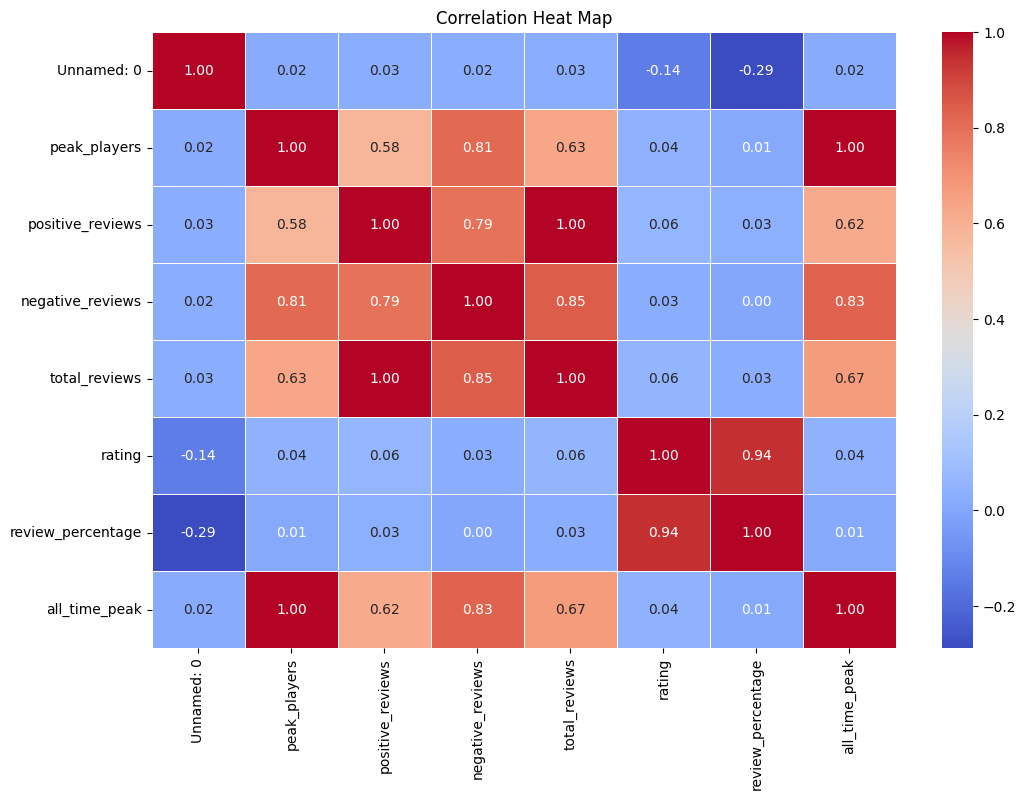

In [40]:
# Selecting Numerical Data
datosNumericos = games.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = datosNumericos.corr()

# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heat Map')
plt.show()

By running the code, we get a heat map that will show us the correlation between the variables.

We can see that certain variables, such as peak_players and all_time_peak, as well as positive_reviews and total_reviews, have a perfect, positive correlation. This means that as one of these variables increases, the other also tends to increase.

### Business Questions

Now, it's time to ask some business questions that will help us better understand our data and make more informed decisions for the company.

#### What are the highest rated games?

To answer this question, we'll start by selecting the games that have the highest ratings. We'll then represent this information in a bar graph to make it easier to visualize.

                    WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\1766780037.py:6:      ]8;id=436201;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=477671;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='rating', y='game', data=top_rated_games,                             
                             palette='plasma')                                                                     
                                                                                                                   

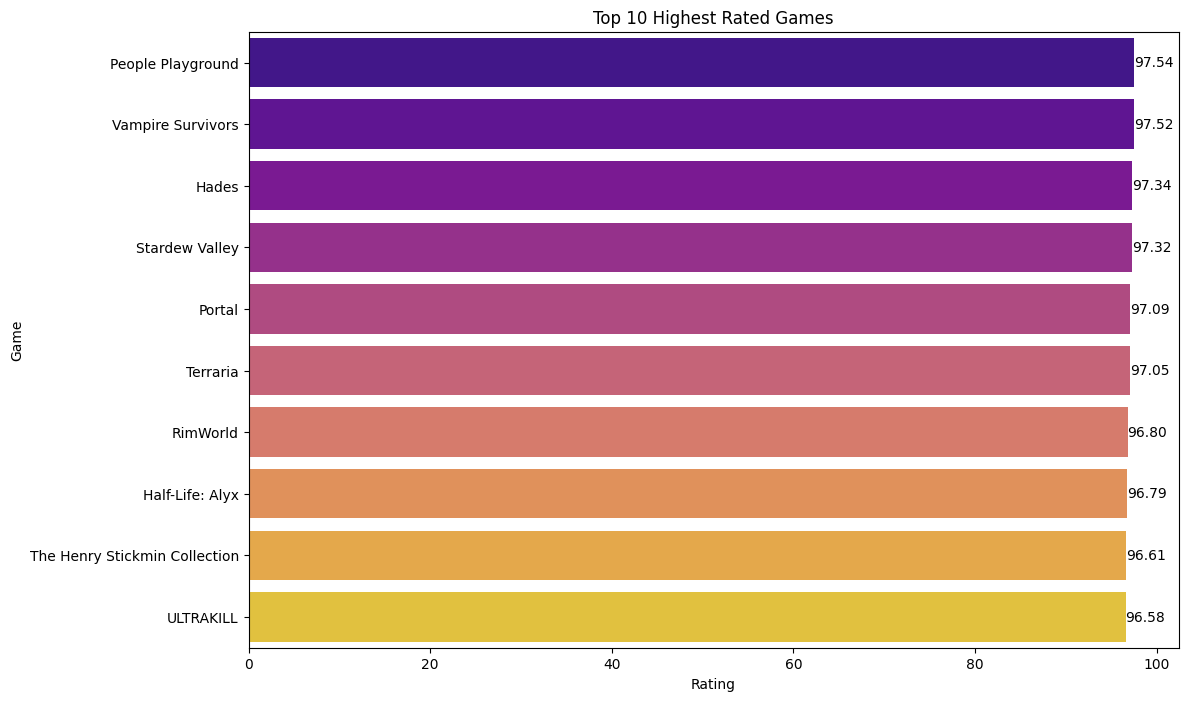

In [41]:
# Select the games with the highest rating
top_rated_games = games[['game', 'rating']].sort_values(by='rating', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='rating', y='game', data=top_rated_games, palette='plasma')

# Add titles and labels
plt.title('Top 10 Highest Rated Games')
plt.xlabel('Rating')
plt.ylabel('Game')

# Add the rating values ​​above each bar
for index, value in enumerate(top_rated_games['rating']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

# Display the chart
plt.show()

By running the code, we generate a graph showing the top ten highest-rated games. Each bar represents a game, and the height of the bar reflects its rating. Additionally, we place the rating value above each bar for better understanding.

#### What are the games with the most positive reviews?

To answer this question, we'll select the games that have received the most positive reviews. This will give us a good idea of ​​which titles are most acclaimed by gamers. As before, we'll represent this information in a bar graph.

[10/01/24 18:06:16] WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\4104490132.py:6:      ]8;id=395524;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=451523;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='positive_reviews', y='game',                                         
                             data=top_positive_reviews_games, palette='plasma')                                    
                                                                                                                   

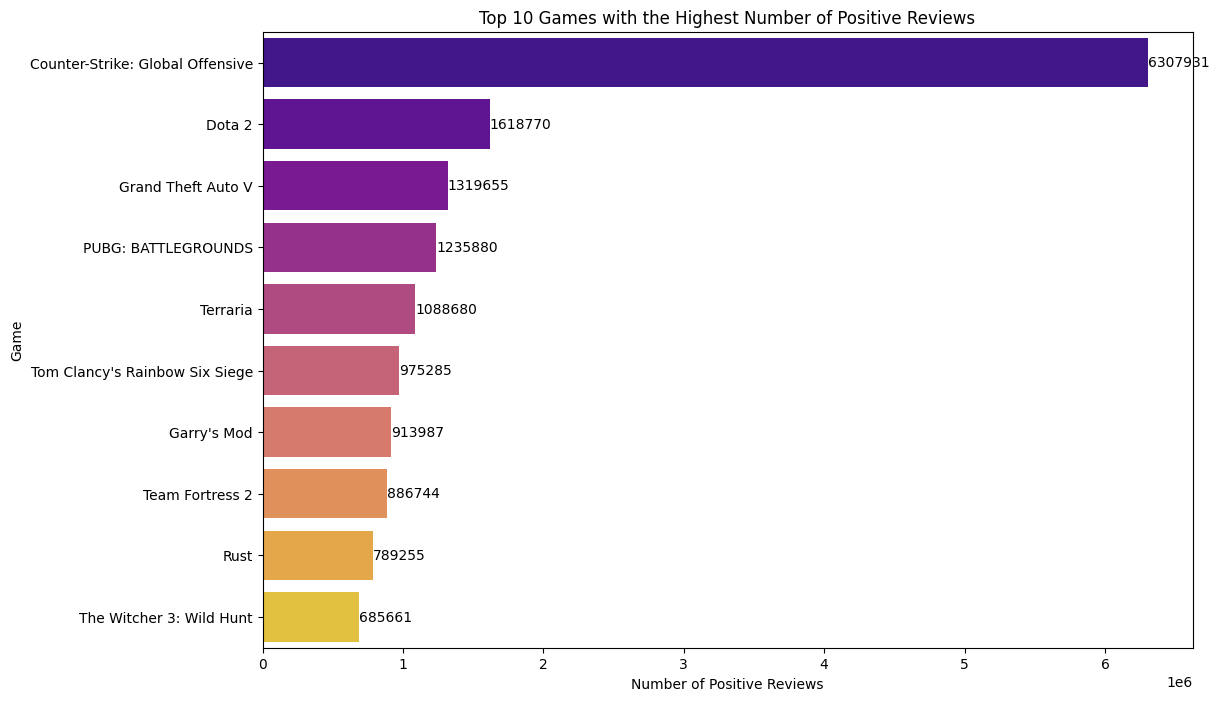

In [42]:
# Select the games with the highest number of positive reviews
top_positive_reviews_games = games[['game', 'positive_reviews']].sort_values(by='positive_reviews', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='positive_reviews', y='game', data=top_positive_reviews_games, palette='plasma')

# Add titles and labels
plt.title('Top 10 Games with the Highest Number of Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Game')

# Add the values ​​for the number of positive reviews above each bar
for index, value in enumerate(top_positive_reviews_games['positive_reviews']):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center")
    
# Show the graph
plt.show()

By running the code, we generate a graph illustrating the ten games with the highest number of positive reviews. Each bar represents a game, and its length indicates the number of positive reviews received. We also display the exact number of reviews above each bar to make it easier to interpret.

#### What are the games with the highest number of concurrent players?

To do this, we are interested in identifying those games that have had the most players at their peak. This data can give us an idea of ​​the appeal and popularity of each game at its most active time.

                    WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\1383202200.py:6:      ]8;id=160910;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=968912;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               ax = sns.barplot(x='peak_players', y='game',                                        
                             data=top_peak_players_games, palette='plasma')                                        
                                                                                                                   

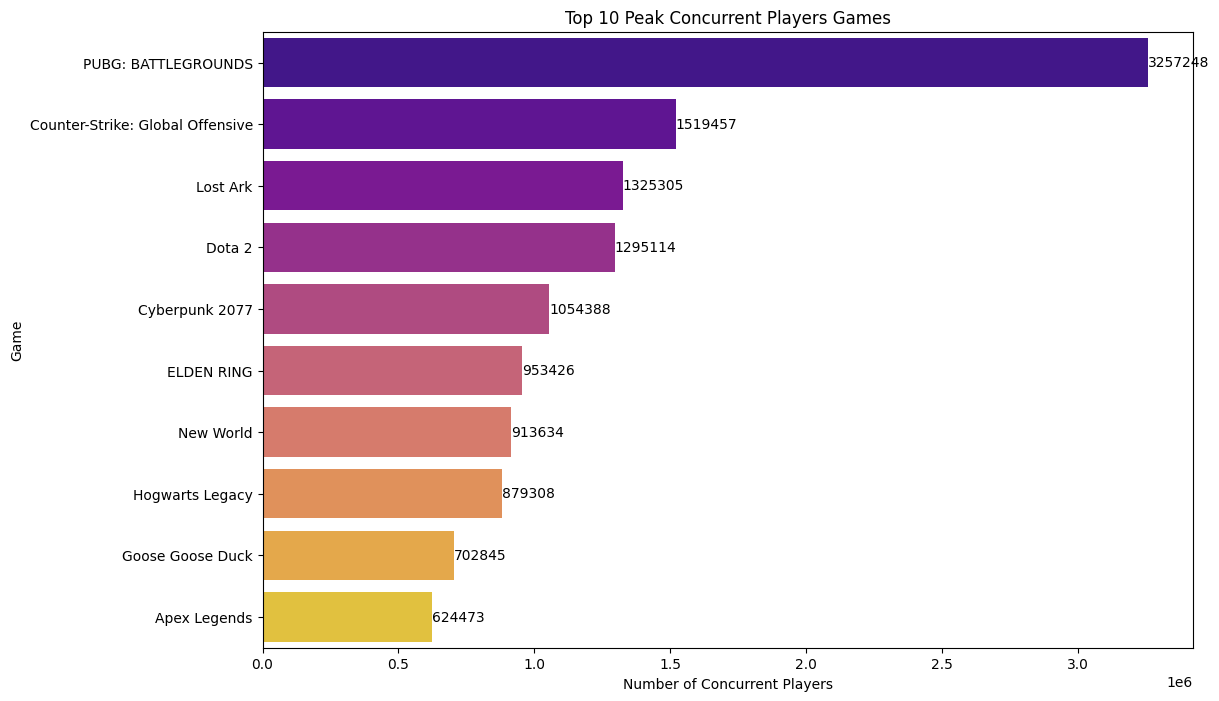

In [43]:
# Select the games with the highest number of peak concurrent players
top_peak_players_games = games[['game', 'peak_players']].sort_values(by='peak_players', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='peak_players', y='game', data=top_peak_players_games, palette='plasma')

# Add titles and labels
plt.title('Top 10 Peak Concurrent Players Games')
plt.xlabel('Number of Concurrent Players')
plt.ylabel('Game')

# Add the values ​​for the number of concurrent players above each bar
for index, value in enumerate(top_peak_players_games['peak_players']):
    ax.text(value, index, f'{value}', color='black', ha='left', va='center')

# Show the graph
plt.show()

Running the code, we get a graph showing the ten games with the highest number of concurrent players at their peak. Each bar represents a game, and its length indicates how many players were active at the same time.

#### How do game ratings vary based on the number of positive reviews?

This question will help us understand if there is a relationship between the number of positive reviews and the average rating that games receive. To visualize this information, we will calculate the average rating grouped by ranges of positive reviews.

                    WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\2304389595.py:2:      ]8;id=708216;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=133932;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning: The default of observed=False is deprecated and will be                
                             changed to True in a future version of pandas. Pass observed=False to                 
                             retain current behavior or observed=True to adopt the future default                  
                             and silence this warning.                                                             
                               reviews_rating_avg = games.groupby(pd.cut(games['positive_reviews'],                
                             bins=[0, 50, 200, 500, 1000, 5000, 10000,                                             
                             50000]))['rating'].mean().reset_index()                                               
                                                                                                                   

                    WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\2304389595.py:5:      ]8;id=766423;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=937994;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `x` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='positive_reviews', y='rating',                                       
                             data=reviews_rating_avg, palette='Blues_d')                                           
                                                                                                                   

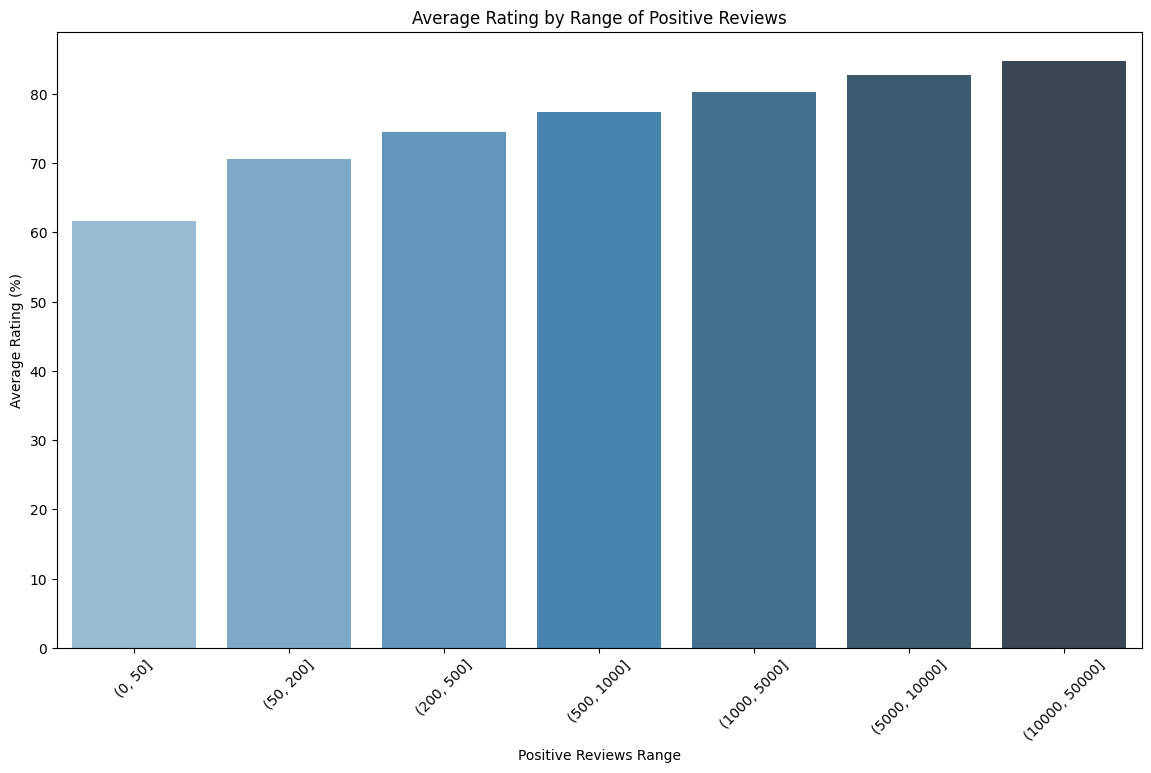

In [44]:
# Calculate the average rating for each range of positive reviews
reviews_rating_avg = games.groupby(pd.cut(games['positive_reviews'], bins=[0, 50, 200, 500, 1000, 5000, 10000, 50000]))['rating'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='positive_reviews', y='rating', data=reviews_rating_avg, palette='Blues_d')
plt.title('Average Rating by Range of Positive Reviews')
plt.xlabel('Positive Reviews Range')
plt.ylabel('Average Rating (%)')
plt.xticks(rotation=45)
plt.show()

By running the code, we get a bar graph that represents the average rating of games based on different ranges of positive reviews. This allows us to observe how the rating varies as the number of positive reviews increases, which can offer valuable insights into the overall perception of games by players.

#### What is the distribution of Ratings by Gender?

To understand how game ratings are distributed by genre, let's create a boxplot. This type of chart allows us to visualize the variability of ratings within each genre and detect potential outliers.

[10/01/24 18:06:17] WARNING  C:\Users\diego\AppData\Local\Temp\ipykernel_4816\905428915.py:3:       ]8;id=563389;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=151670;file://C:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\warnings.py#112\112]8;;\
                             FutureWarning:                                                                        
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `x` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.boxplot(x='primary_genre', y='rating', data=games,                              
                             palette='Set2')                                                                       
                                                                                                                   

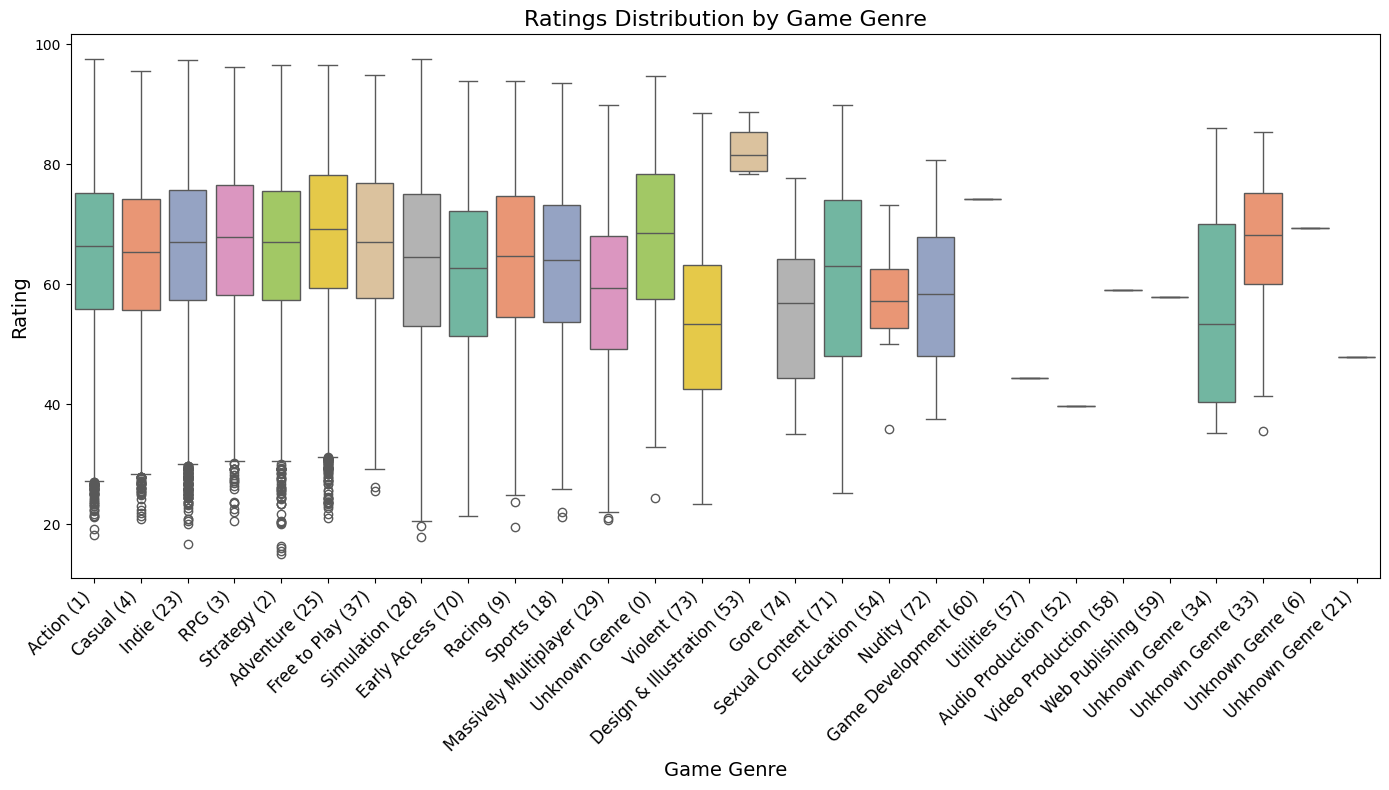

In [45]:
# Ratings distribution by genre
plt.figure(figsize=(14, 8)) # Adjusted chart size for better visibility
sns.boxplot(x='primary_genre', y='rating', data=games, palette='Set2')

# Improve spacing of x-axis labels
plt.title('Ratings Distribution by Game Genre', fontsize=16)
plt.xlabel('Game Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) # Adjust rotation and alignment of x-axis labels

plt.tight_layout() # Adjust layout to avoid clipping
plt.show()

We can see how game ratings are distributed based on their genre, which gives us valuable information about preferences and trends in the video game market.

#### How does the maximum number of concurrent players vary between popular genres?

To explore how the maximum number of concurrent players varies across the most popular genres, we'll group the data by the main genre and calculate the maximum number of players that have been online simultaneously for each genre. This will allow us to identify which genres have been the most successful in terms of concurrent players.

In [46]:
# Group by 'primary_genre' and calculate the maximum number of concurrent players
max_players_by_genre = games.groupby('primary_genre')['peak_players'].max().reset_index()

# Sort the result by maximum number of players
max_players_by_genre = max_players_by_genre.sort_values(by='peak_players', ascending=False)

# Display the result
print(max_players_by_genre)

                 primary_genre  peak_players
7            Free to Play (37)       3257248
13                     RPG (3)       1054388
0                   Action (1)        953426
11  Massively Multiplayer (29)        913634
1               Adventure (25)        879308
10                  Indie (23)        489886
3                   Casual (4)        447476
18                Strategy (2)        192298
16             Simulation (28)        189464
17                 Sports (18)        147632
14                  Racing (9)         88029
5            Early Access (70)         61109
19           Unknown Genre (0)         53002
15         Sexual Content (71)          1856
26                Violent (73)          1598
9                    Gore (74)           691
21          Unknown Genre (33)           337
8        Game Development (60)           333
4   Design & Illustration (53)           233
22          Unknown Genre (34)            88
12                 Nudity (72)            41
27        

With this analysis, we can see which game genres have attracted the most players at the same time, which can be an indication of their popularity and success in the market.

#### Which game genre has the highest average rating and also the highest number of concurrent players?

To determine which game genre has the highest average rating and also the highest number of concurrent players, we will calculate the average rating and the maximum number of players per genre. This analysis will allow us to identify the genre that stands out both in terms of game quality (rating) and popularity (concurrent players).

In [47]:
# Calculate average rating and maximum number of concurrent players per gender
genero_rating_max_jugadores = games.groupby('primary_genre').agg({
'rating': 'mean',
'peak_players': 'max'
}).reset_index()

# Sort by average rating and then by maximum number of players
genero_rating_max_jugadores = genero_rating_max_jugadores.sort_values(by=['rating', 'peak_players'], ascending=[False, False])

# Display the result
print(genero_rating_max_jugadores)

                 primary_genre     rating  peak_players
4   Design & Illustration (53)  82.595000           233
8        Game Development (60)  74.150000           333
23           Unknown Genre (6)  69.340000            12
1               Adventure (25)  67.561084        879308
19           Unknown Genre (0)  66.838065         53002
7            Free to Play (37)  66.800005       3257248
21          Unknown Genre (33)  66.668182           337
13                     RPG (3)  66.577058       1054388
10                  Indie (23)  65.594101        489886
18                Strategy (2)  65.551706        192298
0                   Action (1)  64.874466        953426
3                   Casual (4)  64.269843        447476
14                  Racing (9)  63.674335         88029
16             Simulation (28)  63.615956        189464
17                 Sports (18)  62.769694        147632
5            Early Access (70)  61.346574         61109
15         Sexual Content (71)  60.798387       

Running the code, we can see a DataFrame that lists the game genres, along with their average rating and maximum number of concurrent players, sorted to easily identify which genre excels in both metrics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7fec9793-84b9-405c-9f72-2b5bb6adeca3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>